In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

In [71]:
def map_entries(e):
    k, v = e.split(':')
    return (k, [float(v)])
def me2dict(d):
    return dict(list(map(map_entries, d.split(","))))


In [72]:

def get_speedup(m, a):
    speedup = m.drop(columns='algo').loc[0] / m.drop(columns='algo').loc[a]
    return speedup

In [85]:
def get_data(file, algos):
    with open(file) as f:
        a = f.read().split()
        data_d = list(map(me2dict, a))
        c = 0
        for d in data_d:
            d['algo'] = [algos[c]]
            c+=1
            c%=len(algos)
        for i in range(1, len(data_d)):
            for k in data_d[0]:
                data_d[0][k] += data_d[i][k]

    df = pd.DataFrame.from_dict(data_d[0])
    return df


## Seq

In [87]:
get_data('seq-res.txt', [0])

,arr_s,buckets,0_random_generating,1_buckets_ins_filling_(squash),2_buckets_sorting,3_buckets_to_main_array,total_time,algo
0,10000000.0,1000.0,0.058329,0.186240,1.562592,0.055860,1.867728,0
1,10000000.0,2000.0,0.058622,0.206112,1.496175,0.058272,1.822878,0
2,10000000.0,3000.0,0.060992,0.205538,1.382483,0.067803,1.720679,0
3,10000000.0,4000.0,0.063198,0.220137,1.354807,0.056937,1.699329,0
4,10000000.0,5000.0,0.060231,0.222415,1.344927,0.059580,1.691055,0
...,...,...,...,...,...,...,...,...
95,10000000.0,96000.0,0.059997,0.616004,0.852275,0.065756,1.610328,0
96,10000000.0,97000.0,0.060216,0.680537,0.909975,0.069226,1.737321,0
97,10000000.0,98000.0,0.058791,0.604673,0.864592,0.065868,1.610292,0
98,10000000.0,99000.0,0.058872,0.636654,0.892307,0.071584,1.677337,0


## Both parallel

In [84]:
df = get_data('buckets.txt', [0, 2, 3])
df.head()

,arr_s,buckets,0_random_generating,1_buckets_ins_filling_(squash),2_buckets_sorting,3_buckets_to_main_array,total_time,algo
0,10000000.0,1000.0,0.129219,0.987505,3.027916,0.167040,4.335940,0
1,10000000.0,1000.0,0.033059,0.458587,0.787683,0.031181,1.310842,2
2,10000000.0,1000.0,0.033653,0.531642,0.933256,0.058224,1.579335,3
3,10000000.0,2000.0,0.138066,1.092889,2.839885,0.166448,4.258515,0
4,10000000.0,2000.0,0.033276,0.537203,0.736848,0.031458,1.339208,2


#### total time vs buckets_no

<AxesSubplot: xlabel='buckets', ylabel='total_time'>

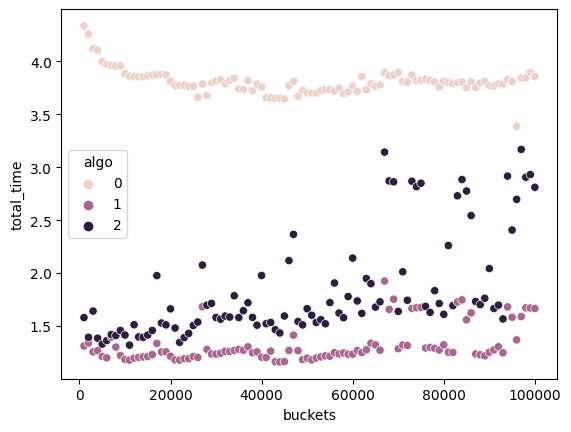

In [74]:
sns.scatterplot(data=df, x='buckets', y='total_time', hue='algo')

In [75]:
def plot(df, i):
    a = df.loc[df['algo'] == i]
    a.drop(columns=['algo', 'buckets', 'arr_s', 'total_time']).plot(kind='bar', stacked=True)
    plt.title(f"time for {i}")

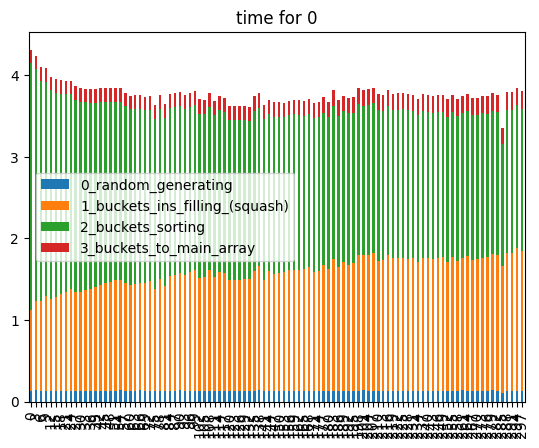

In [76]:
plot(df, 0)

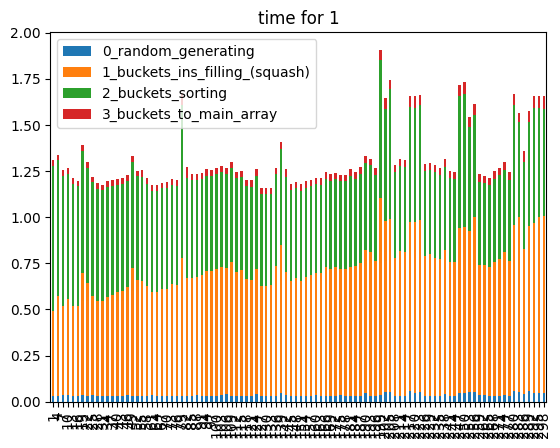

In [77]:
plot(df, 1)

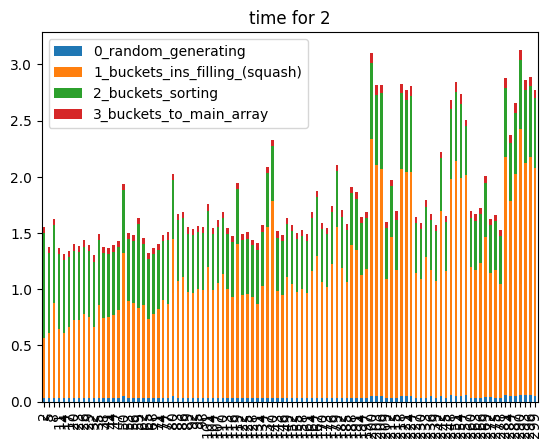

In [78]:
plot(df, 2)

In [79]:
def plot_s(df, i):
    a = df.drop(columns=['buckets', 'arr_s'])
    d1 = a.loc[a['algo'] == i].drop(columns='algo')
    d2 = a.loc[a['algo'] == 0].drop(columns='algo')
    d1, d2 = np.array(d1), np.array(d2)
    a = d1 / d2
    d = pd.DataFrame(data=a, columns=df.columns[2:7])
    d.plot(kind='line', stacked=True)
    plt.title(f"speedup for {i}")

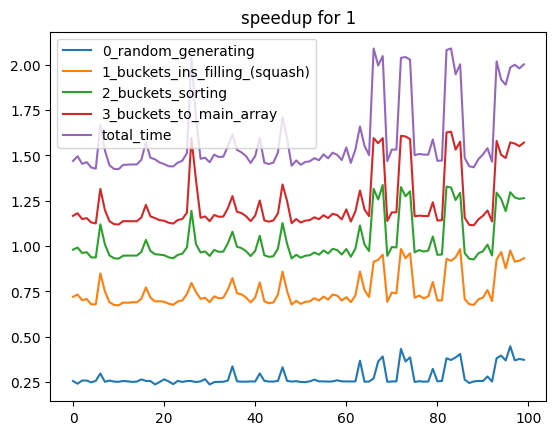

In [80]:
plot_s(df, 1)

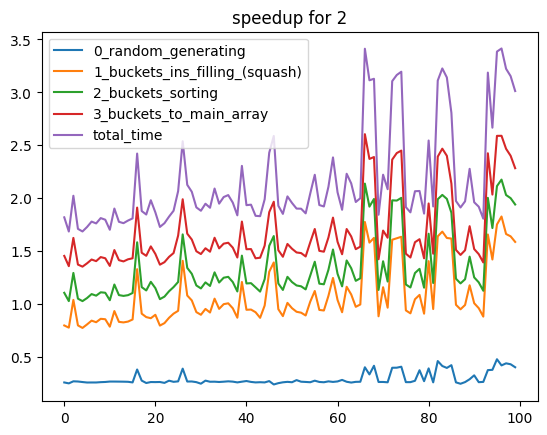

In [81]:
plot_s(df, 2)